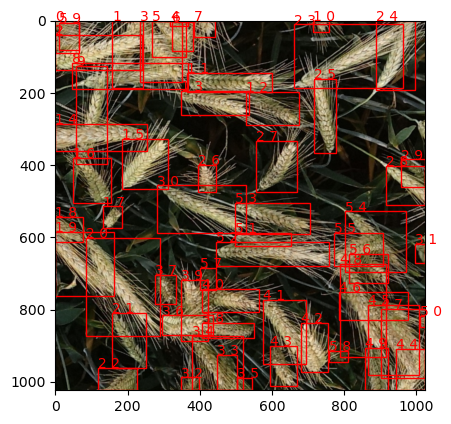

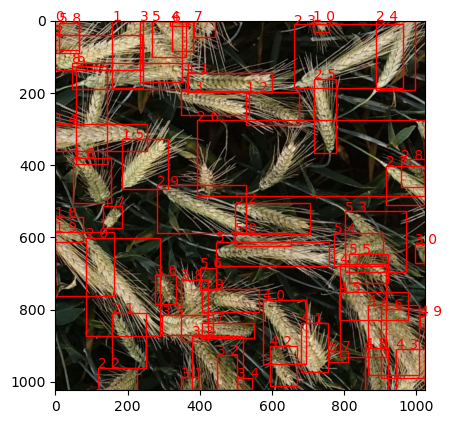

In [93]:
"""
Basic notebook for displaying images with corresponding boxes and hand fixing them.
"""

import os
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import pandas as pd

def draw_bboxes(img, bboxes: str):
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    bboxes = bboxes.split(';')
    bboxes = [bbox.split(' ') for bbox in bboxes]
    for i, bbox in enumerate(bboxes):
        x_min, y_min, x_max, y_max = map(int, bbox)
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min, ' '.join(str(i)), color='r')
    plt.show()

path = '<path to data>'
labels_path = os.path.join(path, 'competition_train.csv')
image_name = '<image name>'
image_path = os.path.join(path, 'images', image_name)
df = pd.read_csv(labels_path)
old_bboxes = df.loc[df.loc[:, 'image_name'] == image_name]['BoxesString'].values[0]
new_bboxes = '<new BoxesString>'

draw_bboxes(Image.open(image_path), old_bboxes)
draw_bboxes(Image.open(image_path), new_bboxes)